In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
key = pd.read_csv("../genotypingkey_P7.csv", index_col = False)

key["ID"] = (key["Litter"].astype(str)
             .str.cat(key["Animal"].astype(str), sep='-'))
key

,Litter,Animal,AnimalID,Type,ID
0,42,2,42-2,mut,42-2
1,42,3,42-3,mut,42-3
2,42,4,42-4,wt,42-4
3,42,5,42-5,wt,42-5
4,42,6,42-6,het,42-6
5,43,0,43-0,wt,43-0
6,43,1,43-1,wt,43-1
7,43,2,43-2,mut,43-2
8,43,3,43-3,wt,43-3
9,43,4,43-4,mut,43-4


In [3]:
import glob

outgrowth_csvs = glob.glob("../outgrowth/length_csvs/Results_*.csv")


list_of_csv_dfs = [pd.read_csv(f, usecols=["Length"]) for f in outgrowth_csvs]
csv_df = pd.concat(list_of_csv_dfs,ignore_index=True)

#csv_df
def get_ID_from_filename(filename):
    """returns a unique ID for an animal in a litter
    
    Sample input: "../outgrowth\\Results_42-2-1.csv"
    Sample output: "42-2"
    """
    ID_list = filename.split("Results_")[-1].split("-")[0:2]
    ID = "-".join(ID_list)
    
    return ID

def read_csv_and_add_ID_to_df(filename):
    """returns a Pandas dataframe with Length and ID as its columns"""
    temp_df = pd.read_csv(filename, usecols=["Length"])
    temp_df["ID"] = get_ID_from_filename(filename)
    return temp_df


In [4]:
list_of_dfs = [read_csv_and_add_ID_to_df(f) for f in outgrowth_csvs]
csv_df = pd.concat(list_of_dfs, ignore_index = True)
csv_df.head()

,Length,ID
0,1851.332,42-2
1,2238.183,42-2
2,1882.408,42-2
3,1903.776,42-2
4,1971.795,42-2


In [5]:
df = csv_df.merge(key, how="inner",on="ID")
df.head()

,Length,ID,Litter,Animal,AnimalID,Type
0,1851.332,42-2,42,2,42-2,mut
1,2238.183,42-2,42,2,42-2,mut
2,1882.408,42-2,42,2,42-2,mut
3,1903.776,42-2,42,2,42-2,mut
4,1971.795,42-2,42,2,42-2,mut


In [6]:
(df
 .round(2)
 .to_csv("../UnblindedP7OutgrowthData.csv")
)

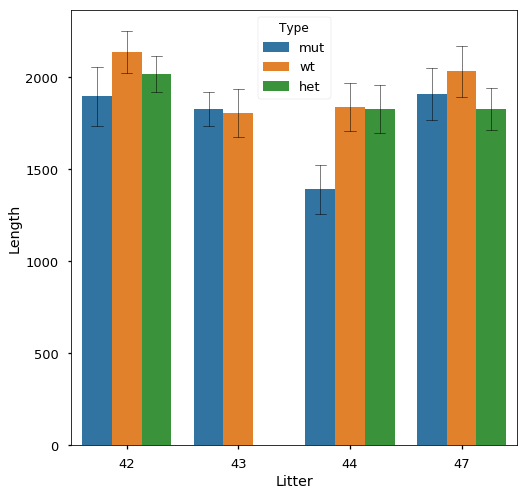

In [7]:
with sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(8,8))
    
    g = sns.barplot(x = "Litter", y = "Length",
                    hue = "Type",
                    data = df,
                    ci='sd',
                    errcolor='black',
                    errwidth=0.5,
                    capsize=0.1,
                    ax=ax
                   )

    #sns.stripplot(data = df, color=sns.xkcd_rgb['black'],)



In [8]:
df.groupby(["Litter","Type"])["Length"].describe()

count         mean         std       min         25%        50%  \
Litter Type                                                                    
42     het     8.0  2019.178250  104.110536  1862.516  1957.38775  2013.7340   
       mut    16.0  1896.698750  166.759047  1563.913  1834.43050  1880.3805   
       wt     15.0  2138.391533  117.495387  1924.008  2070.64800  2107.1560   
43     mut    18.0  1829.322389   94.611556  1673.480  1760.88050  1819.5395   
       wt     24.0  1805.178458  134.360020  1426.403  1740.96000  1815.0410   
44     het     9.0  1827.828000  137.756688  1626.745  1753.16400  1774.6030   
       mut     8.0  1390.484875  142.240346  1159.901  1290.50700  1428.0195   
       wt     18.0  1838.596000  133.808564  1557.815  1739.87500  1839.7795   
47     het    24.0  1829.958458  116.060888  1654.001  1726.35375  1818.5025   
       mut    24.0  1908.796625  144.563950  1626.803  1791.77850  1878.3665   
       wt      8.0  2033.671000  148.400537  1837.485  1939.52975  2031.7260   

                    75%       max  
Litter Type                        
42     het   2071.76700  2189.293  
       mut   1986.55325  2238.183  
       wt    2227.08350  2323.330  
43     mut   1898.74975  2017.500  
       wt    1879.86275  2037.246  
44     het   1972.82300  2013.657  
       mut   1462.48325  1614.280  
       wt    1923.47400  2043.925  
47     het   1892.47350  2056.836  
       mut   2037.82800  2242.280  
       wt    2134.95450  2268.924

In [9]:
data_agg = (df
            .groupby(["Litter","Type"])["Length"]
            .agg([np.mean, np.std])
           )
data_agg

mean         std
Litter Type                         
42     het   2019.178250  104.110536
       mut   1896.698750  166.759047
       wt    2138.391533  117.495387
43     mut   1829.322389   94.611556
       wt    1805.178458  134.360020
44     het   1827.828000  137.756688
       mut   1390.484875  142.240346
       wt    1838.596000  133.808564
47     het   1829.958458  116.060888
       mut   1908.796625  144.563950
       wt    2033.671000  148.400537

In [10]:
wt = data_agg["mean"].xs("wt", level = "Type")
het = data_agg["mean"].xs("het", level="Type")
mut = data_agg["mean"].xs("mut", level="Type")

mut_and_wild_litters = list(mut.index & wt.index)

diff = wt.loc[mut_and_wild_litters] - mut.loc[mut_and_wild_litters]
diff

Litter
42    241.692783
43    -24.143931
44    448.111125
47    124.874375
Name: mean, dtype: float64

In [11]:
diff.mean()

197.63358819444437

In [12]:
from scipy import stats
t_stat, p_val_two_tail =stats.ttest_rel(wt, mut)
print("one tailed p value: {:.3f}".format(p_val_two_tail / 2))

one tailed p value: 0.071


In [13]:
norm_data = mut.loc[mut_and_wild_litters] / wt.loc[mut_and_wild_litters] * 100
norm_data = norm_data.to_frame()
norm_data

,mean
Litter,
42,88.697449
43,101.337482
44,75.627537
47,93.859657


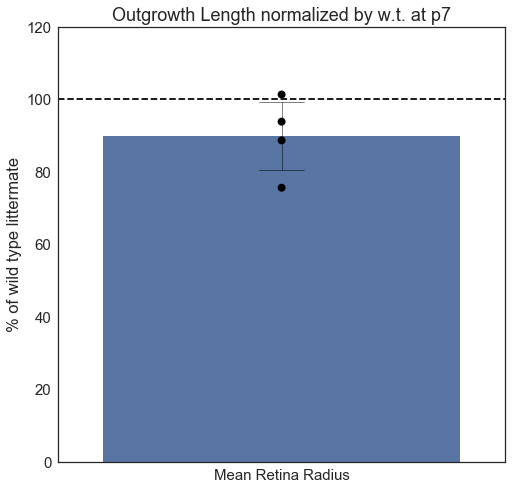

In [14]:
sns.set(style='ticks', color_codes = True)
sns.set_style("white")

with sns.plotting_context("notebook", font_scale = 1.5):
    fig, ax = plt.subplots(figsize=(8,8))
    
    normplot = sns.barplot(data = norm_data,
                          ci = 'sd',
                          errcolor = sns.xkcd_rgb["black"],
                          errwidth = 0.5,
                          capsize = 0.1,
                          )
    sns.stripplot(data = norm_data,
                 color = sns.xkcd_rgb["black"],
                 size = 8,
                 alpha = 1,
                 )
    
    ax.set_ylabel('% of wild type littermate')
    ax.set_ylim([0, 120])
    ax.axhline(100, color='black', linestyle='--')
    ax.set_title('Outgrowth Length normalized by w.t. at p7')
    ax.set_xticklabels(["Mean Retina Radius"])